# Problem Statement

Applying ML Classification algorithms on the data set and getting inferences from the data.

# Data-Set

We have collected our dataset from the following link: https://www.kaggle.com/uciml/mushroom-classification.
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible or definitely poisonous.
Number of Instances: 8124

# Attributes

    Number of Attributes: 22 (all nominally valued)
    cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
    cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
    cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
    bruises: bruises=t,no=f
    odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
    gill-attachment: attached=a,descending=d,free=f,notched=n
    gill-spacing: close=c,crowded=w,distant=d
    gill-size: broad=b,narrow=n
    gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
    stalk-shape: enlarging=e,tapering=t
    stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
    stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
    stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
    veil-type: partial=p,universal=u
    veil-color: brown=n,orange=o,white=w,yellow=y
    ring-number: none=n,one=o,two=t
    ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
    spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
    population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
    habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Libraries

- NumPy(Numerical Python) gives an lot of useful things for linear algebra & operations on n-arrays.
- Pandas is a python package who is a perfect tool for data preprocessing.
- Matplotlib is a python library which is great in making data visulations.
- Seaborn is mostly focused on the visualization of statistical model.
- Scikit-learn exposes a concise & consistent interface to the common machine learning algorithms.

In [2]:
#Allows charts to appear in notebook
%matplotlib inline         
#Libraries
import pandas as pan
import numpy as nmp
from sklearn import svm
from sklearn.model_selection import train_test_split
#Visual Libraries
import matplotlib.pyplot as mpp
import seaborn as sbn; sbn.set(font_scale=1.5)
# Label Encoding
from sklearn.preprocessing import LabelEncoder
# Using for dividing the dataset in training dataset and testing dataset
from sklearn.model_selection import train_test_split
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Importing the file of Mushroom Dataset

In [3]:
mushroom_dataframe = pan.read_csv("mushrooms.csv")
mushroom_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

# Data Cleaning

Description of dataset says that data column 'stalk-root' has some missing values, represented by '?'. 
Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a dataset.
So, we are going to exclude the data rows that contains these values in their 'stalk-root' column.

In [4]:
mushroom_dataframe = mushroom_dataframe[mushroom_dataframe['stalk-root'] != '?']

# Splitting non-class and class variables

In [6]:
# Target dataset
target = mushroom_dataframe['class']
# Features(non-class variables) dataset
features = mushroom_dataframe.drop(columns=['class'])
# For checking purpose
features.head() 

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


# Data Transformation

Data transformation is the process of converting data or information from one format to another, usually from the format of a source system into the required format of a new destination system. 
This dataset is based on non-numeric data. Machine learning models are based on numeric data. So, we are going to convert
this data into numeric .To accomplish this, we use built-in class of python called LabelEncoder.

In [7]:
# Encoding non-class variables dataset 
Feature_Enc = LabelEncoder()
for a in features.columns:
    features[a] = Feature_Enc.fit_transform(features[a])
# Encoding class variable dataset
Target_Enc = LabelEncoder()
target = Target_Enc.fit_transform(target)

In [8]:
target

array([1, 0, 0, ..., 0, 1, 1])

Here, we get 1 in place of poisonous value and 0 in place of edible value.

In [9]:
features.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,2,0,...,2,5,5,0,0,1,3,1,3,5
1,5,2,7,1,0,1,0,0,2,0,...,2,5,5,0,0,1,3,2,2,1
2,0,2,6,1,3,1,0,0,3,0,...,2,5,5,0,0,1,3,2,2,3
3,5,3,6,1,6,1,0,1,3,0,...,2,5,5,0,0,1,3,1,3,5
4,5,2,3,0,5,1,1,0,2,1,...,2,5,5,0,0,1,0,2,0,1
5,5,3,7,1,0,1,0,0,3,0,...,2,5,5,0,0,1,3,1,2,1
6,0,2,6,1,0,1,0,0,0,0,...,2,5,5,0,0,1,3,1,2,3
7,0,3,6,1,3,1,0,0,3,0,...,2,5,5,0,0,1,3,2,3,3
8,5,3,6,1,6,1,0,1,4,0,...,2,5,5,0,0,1,3,1,4,1
9,0,2,7,1,0,1,0,0,0,0,...,2,5,5,0,0,1,3,1,3,3


Here also, you can see that categorical values are also changed into numerical values.

Now, we are going to change this features dataset into only 0,1 values using dummy variables.
A Dummy variable is one that takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.

In [10]:
features=pan.get_dummies(features,columns=features.columns,drop_first=True)

# Breaking the dataset into Test Set and Training Set

Split dataset into random train and test subsets.

In [11]:
featuresTrain, featuresTest, targetTrain, targetTest = train_test_split(features, target, test_size=0.2, random_state=42)

# Data normalization(Feature Scaling)

Database normalization is the process of restructuring a relational database in accordance with a series of so-called normal forms in order to reduce data redundancy and improve data integrity. Feature scaling through standardization can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

In [14]:
standardscaler = StandardScaler()
featuresTrain = standardscaler.fit_transform(featuresTrain)
featuresTest = standardscaler.transform(featuresTest)

# Applying Principal Component Analysis

Principal Component Analysis (PCA) is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set. We are using this to reduce 22 columns features dataset into only 2 variables features dataset.

In [15]:
from sklearn.decomposition import PCA
p_c_a = PCA(n_components=2)
featuresTrain = p_c_a.fit_transform(featuresTrain)
featuresTest = p_c_a.transform(featuresTest)

# Algorithms

abc

In [33]:
def training_visual(mdel):
    sbn.set_context(context='notebook',font_scale=3)
    mpp.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    featuresSet, targetSet = featuresTrain, targetTrain
    feature1, feature2 = nmp.meshgrid(nmp.arange(start = featuresSet[:, 0].min() - 1, stop = featuresSet[:, 0].max() + 1, step = 0.01),
                     nmp.arange(start = featuresSet[:, 1].min() - 1, stop = featuresSet[:, 1].max() + 1, step = 0.01))
    mpp.contourf(feature1, feature2, classifier.predict(nmp.array([feature1.ravel(), feature2.ravel()]).T).reshape(feature1.shape),
             alpha = 0.6, cmap = ListedColormap(('blue', 'yellow')))
    mpp.xlim(feature1.min(), feature1.max())
    mpp.ylim(feature2.min(), feature2.max())
    for i, j in enumerate(nmp.unique(targetSet)):
        mpp.scatter(featuresSet[targetSet == j, 0], featuresSet[targetSet == j, 1],
                    c = ListedColormap(('blue', 'yellow'))(i), label = j)
    mpp.title("%s TrainingSet Visual" %(mdel))
    mpp.xlabel('PC 1')
    mpp.ylabel('PC 2')
    mpp.legend()
def testing_visual(mdel):
    sbn.set_context(context='notebook',font_scale=2)
    mpp.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    featuresSet, targetSet = featuresTest, targetTest
    feature1, feature2 = nmp.meshgrid(nmp.arange(start = featuresSet[:, 0].min() - 1, stop = featuresSet[:, 0].max() + 1, step = 0.01),
                         nmp.arange(start = featuresSet[:, 1].min() - 1, stop = featuresSet[:, 1].max() + 1, step = 0.01))
    mpp.contourf(feature1, feature2, classifier.predict(nmp.array([feature1.ravel(), feature2.ravel()]).T).reshape(feature1.shape),
                 alpha = 0.6, cmap = ListedColormap(('blue', 'yellow')))
    mpp.xlim(feature1.min(), feature1.max())
    mpp.ylim(feature2.min(), feature2.max())
    for i, j in enumerate(nmp.unique(targetSet)):
        mpp.scatter(featuresSet[targetSet == j, 0], featuresSet[targetSet == j, 1],
                    c = ListedColormap(('blue', 'yellow'))(i), label = j)
    mpp.title("%s TestSet Visual" %(mdel))
    mpp.xlabel('PC 1')
    mpp.ylabel('PC 2')
    mpp.legend()

# Function for showing classifier's performance

In [39]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def printScore(classifier,featuresTrain,targetTrain,featuresTest,targetTest,train=True):
    if train == True:
        print("Results_of_training:\n")
        print('Accuracy_Score: {0:.4f}\n'.format(accuracy_score(targetTrain,classifier.predict(featuresTrain))))
        print('Classifier_Report:\n{}\n'.format(classification_report(targetTrain,classifier.predict(featuresTrain))))
        print('Confusion_Matrix:\n{}\n'.format(confusion_matrix(targetTrain,classifier.predict(featuresTrain))))
        res = cross_val_score(classifier, featuresTrain, targetTrain, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average_Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard_Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Results_of_testing:\n")
        print('Accuracy_Score: {0:.4f}\n'.format(accuracy_score(targetTest,classifier.predict(featuresTest))))
        print('Classifier_Report:\n{}\n'.format(classification_report(targetTest,classifier.predict(featuresTest))))
        print('Confusion_Matrix:\n{}\n'.format(confusion_matrix(targetTest,classifier.predict(featuresTest))))


# ML Classification Algorithms

Now, we are going to apply 2 supervised machine learning algorithms on the mushroom dataset.
    1. Support Vector Machine Classifier
    2. Naive Bayes Classifier

# Support Vector Machine Classifier

Support Vector Machine is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well. Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line).

Advantages
        
        1. High-Dimensionality - The SVM is an effective tool in high-dimensional spaces, which is particularly applicable to document classification and sentiment analysis where the dimensionality can be extremely large.
        
        2. Memory Efficiency - Since only a subset of the training points are used in the actual decision process of         assigning new members, only these points need to be stored in memory (and calculated upon) when making decisions.
        
        3. Versatility - Class separation is often highly non-linear. The ability to apply new kernels allows substantial flexibility for the decision boundaries, leading to greater classification performance.

Disadvantages
        
        1. p>n- In situations where the number of features for each object (p) exceeds the number of training data samples (n), SVMs can perform poorly. This can be seen intuitively, as if the high-dimensional feature space is much larger than the samples, then there are less effective support vectors on which to support the optimal linear hyperplanes, leading to poorer classification performance as new unseen samples are added.
        
        2.Non-Probabilistic - Since the classifier works by placing objects above and below a classifying hyperplane,    there is no direct probabilistic interpretation for group membership. However, one potential metric to determine effectiveness of the classification is how far from the decision boundary the new point is.

In [18]:
# Fitting classifier to the mushroom dataset
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)
classifier.fit(featuresTrain,targetTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
printScore(classifier,featuresTrain,targetTrain,featuresTest,targetTest,train=True)

Results_of_training:

Accuracy_Score: 0.9079

Classifier_Report:
             precision    recall  f1-score   support

          0       0.88      0.99      0.93      2783
          1       0.97      0.78      0.87      1732

avg / total       0.91      0.91      0.91      4515


Confusion_Matrix:
[[2744   39]
 [ 377 1355]]

Average_Accuracy:	0.9072

Standard_Deviation:	0.0108


In [41]:
printScore(classifier,featuresTrain,targetTrain,featuresTest,targetTest,train=False)

Results_of_testing:

Accuracy_Score: 0.8990

Classifier_Report:
             precision    recall  f1-score   support

          0       0.87      0.99      0.92       705
          1       0.97      0.75      0.85       424

avg / total       0.91      0.90      0.90      1129


Confusion_Matrix:
[[695  10]
 [104 320]]



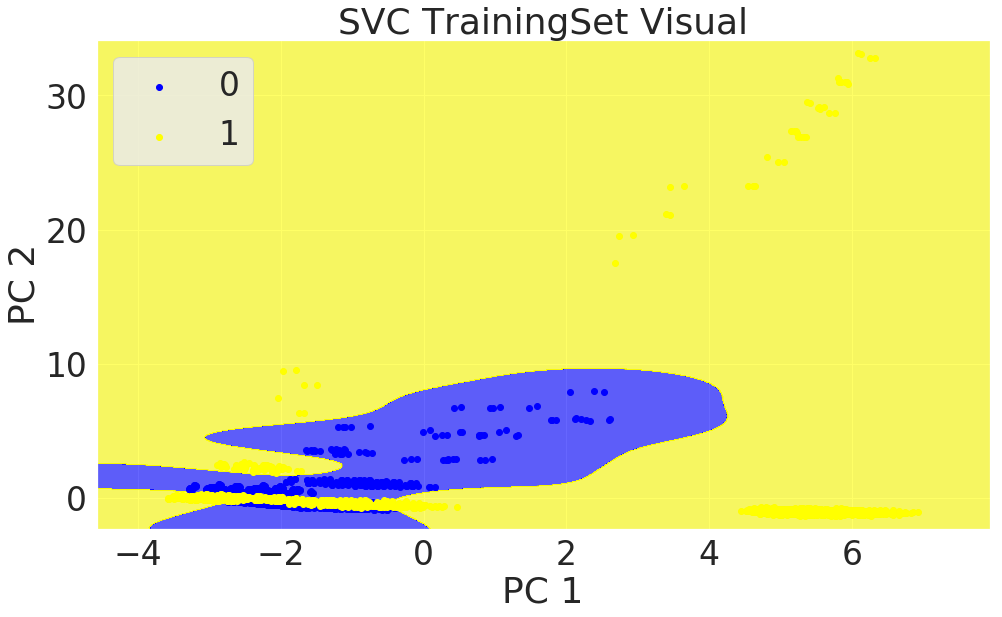

In [35]:
training_visual('SVC')

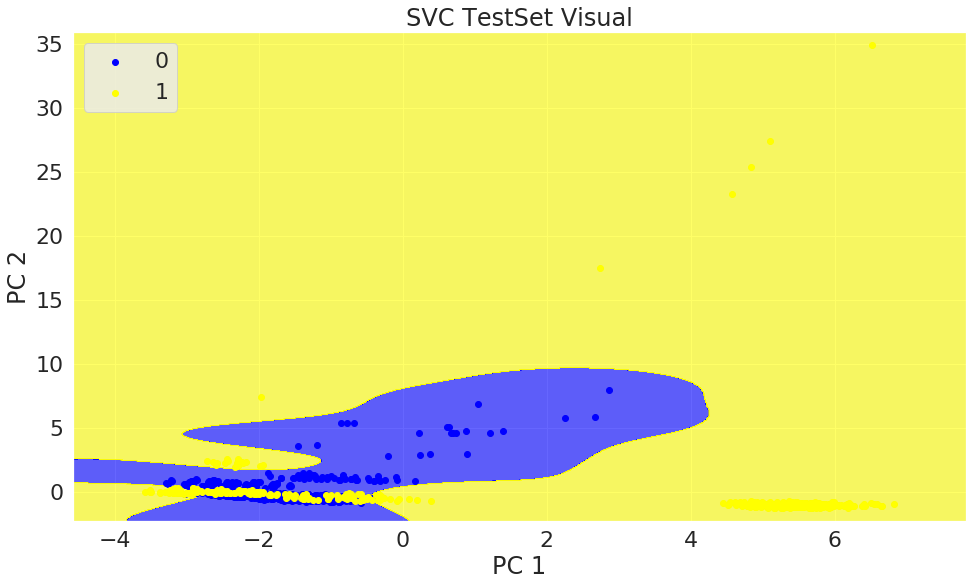

In [36]:
testing_visual('SVC')

# Naive Bayes Classifier

Naive Bayes is a kind of classifier which uses the Bayes Theorem. It predicts membership probabilities for each class such as the probability that given record or data point belongs to a particular class.  The class with the highest probability is considered as the most likely class. This is also known as Maximum A Posteriori (MAP).

The MAP for a hypothesis is:

MAP(H)
= max( P(H|E) )
=  max( (P(E|H)*P(H))/P(E))
= max(P(E|H)*P(H))

P(E) is evidence probability, and it is used to normalize the result. It remains same so, removing it won’t affect.

Naive Bayes classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature. 

In [37]:
# Fitting classifier to the mushroom dataset
from sklearn.naive_bayes import GaussianNB as NB
clas = NB()
clas.fit(featuresTrain,targetTrain)

GaussianNB(priors=None)

In [43]:
printScore(clas,featuresTrain,targetTrain,featuresTest,targetTest,train=True)

Results_of_training:

Accuracy_Score: 0.8443

Classifier_Report:
             precision    recall  f1-score   support

          0       0.81      0.97      0.89      2783
          1       0.94      0.64      0.76      1732

avg / total       0.86      0.84      0.84      4515


Confusion_Matrix:
[[2708   75]
 [ 628 1104]]

Average_Accuracy:	0.8443

Standard_Deviation:	0.0165


In [44]:
printScore(clas,featuresTrain,targetTrain,featuresTest,targetTest,train=False)

Results_of_testing:

Accuracy_Score: 0.8299

Classifier_Report:
             precision    recall  f1-score   support

          0       0.80      0.97      0.88       705
          1       0.92      0.60      0.73       424

avg / total       0.84      0.83      0.82      1129


Confusion_Matrix:
[[682  23]
 [169 255]]



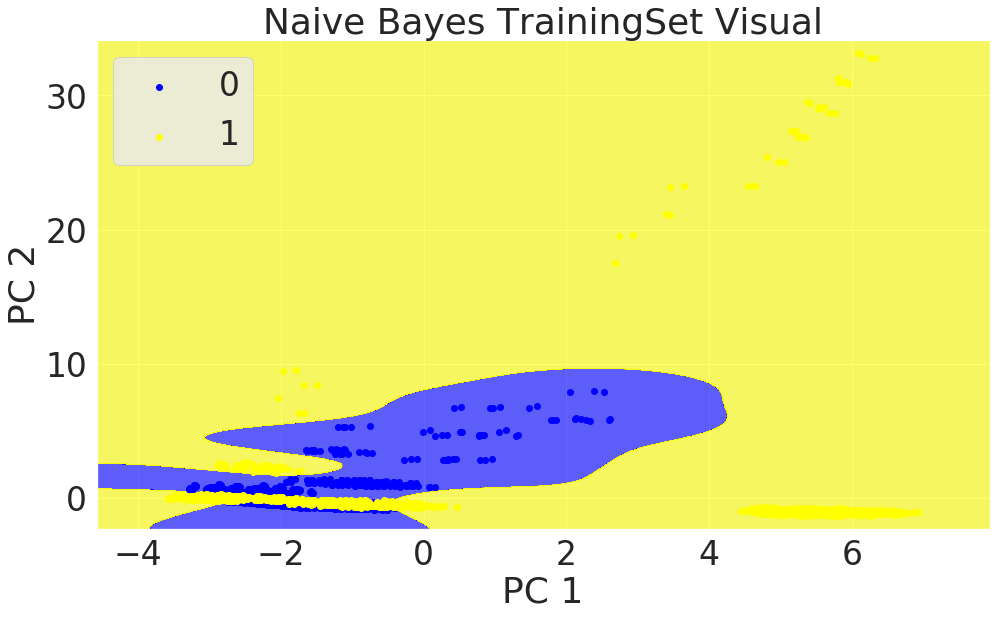

In [45]:
training_visual('Naive Bayes')

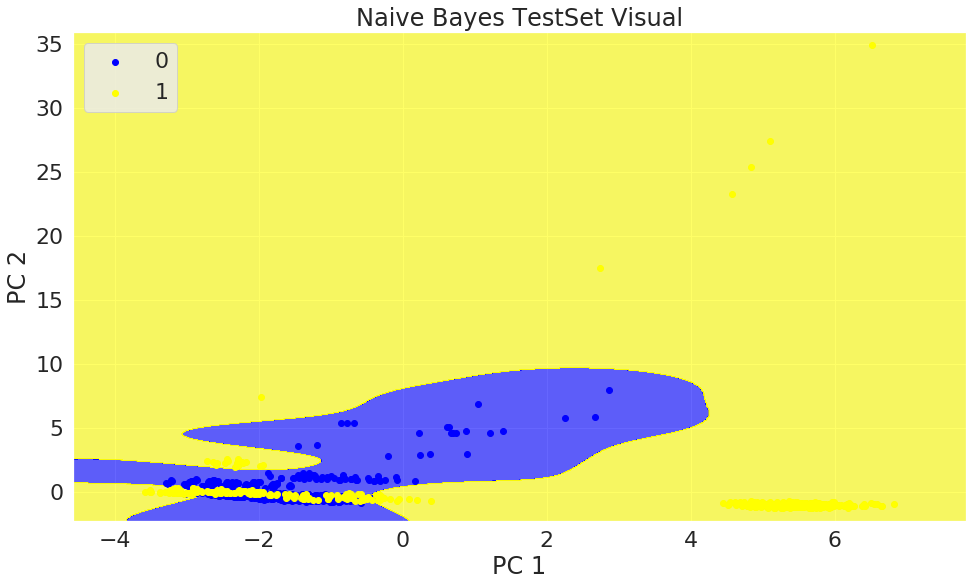

In [47]:
testing_visual('Naive Bayes')